In [38]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np



In [45]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


# Baseline Model

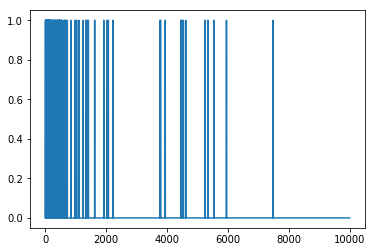

In [46]:
plt.plot(train_data[0])

In [47]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

#设置 optimizer  loss  metrics

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [49]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                      validation_data=(test_data,test_labels),
                                      verbose=2
                                     )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.4957 - acc: 0.7942 - binary_crossentropy: 0.4957 - val_loss: 0.3344 - val_acc: 0.8777 - val_binary_crossentropy: 0.3344
Epoch 2/20
 - 10s - loss: 0.2442 - acc: 0.9137 - binary_crossentropy: 0.2442 - val_loss: 0.2839 - val_acc: 0.8883 - val_binary_crossentropy: 0.2839
Epoch 3/20
 - 10s - loss: 0.1774 - acc: 0.9375 - binary_crossentropy: 0.1774 - val_loss: 0.2919 - val_acc: 0.8842 - val_binary_crossentropy: 0.2919
Epoch 4/20
 - 11s - loss: 0.1414 - acc: 0.9517 - binary_crossentropy: 0.1414 - val_loss: 0.3201 - val_acc: 0.8792 - val_binary_crossentropy: 0.3201
Epoch 5/20
 - 11s - loss: 0.1174 - acc: 0.9615 - binary_crossentropy: 0.1174 - val_loss: 0.3479 - val_acc: 0.8733 - val_binary_crossentropy: 0.3479
Epoch 6/20
 - 10s - loss: 0.0968 - acc: 0.9700 - binary_crossentropy: 0.0968 - val_loss: 0.3820 - val_acc: 0.8686 - val_binary_crossentropy: 0.3820
Epoch 7/20
 - 10s - loss: 0.0803 - acc: 0.9771 - binary_crosse

# smaller model

In [50]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

#设置 optimizer  loss  metrics

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [51]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs = 20,
                                   batch_size=512,
                                   validation_data=(test_data,test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 14s - loss: 0.6370 - acc: 0.6664 - binary_crossentropy: 0.6370 - val_loss: 0.5812 - val_acc: 0.7453 - val_binary_crossentropy: 0.5812
Epoch 2/20
 - 12s - loss: 0.5301 - acc: 0.8183 - binary_crossentropy: 0.5301 - val_loss: 0.5126 - val_acc: 0.8375 - val_binary_crossentropy: 0.5126
Epoch 3/20
 - 15s - loss: 0.4677 - acc: 0.8748 - binary_crossentropy: 0.4677 - val_loss: 0.4781 - val_acc: 0.8501 - val_binary_crossentropy: 0.4781
Epoch 4/20
 - 11s - loss: 0.4279 - acc: 0.9028 - binary_crossentropy: 0.4279 - val_loss: 0.4575 - val_acc: 0.8601 - val_binary_crossentropy: 0.4575
Epoch 5/20
 - 11s - loss: 0.3982 - acc: 0.9198 - binary_crossentropy: 0.3982 - val_loss: 0.4478 - val_acc: 0.8546 - val_binary_crossentropy: 0.4478
Epoch 6/20
 - 11s - loss: 0.3736 - acc: 0.9331 - binary_crossentropy: 0.3736 - val_loss: 0.4343 - val_acc: 0.8670 - val_binary_crossentropy: 0.4343
Epoch 7/20
 - 11s - loss: 0.3524 - acc: 0.9424 - binary_crosse

In [52]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 30s - loss: 0.3407 - acc: 0.8570 - binary_crossentropy: 0.3407 - val_loss: 0.2929 - val_acc: 0.8809 - val_binary_crossentropy: 0.2929
Epoch 2/20
 - 29s - loss: 0.1317 - acc: 0.9521 - binary_crossentropy: 0.1317 - val_loss: 0.3550 - val_acc: 0.8651 - val_binary_crossentropy: 0.3550
Epoch 3/20
 - 30s - loss: 0.0392 - acc: 0.9888 - b

baseline
smaller
bigger


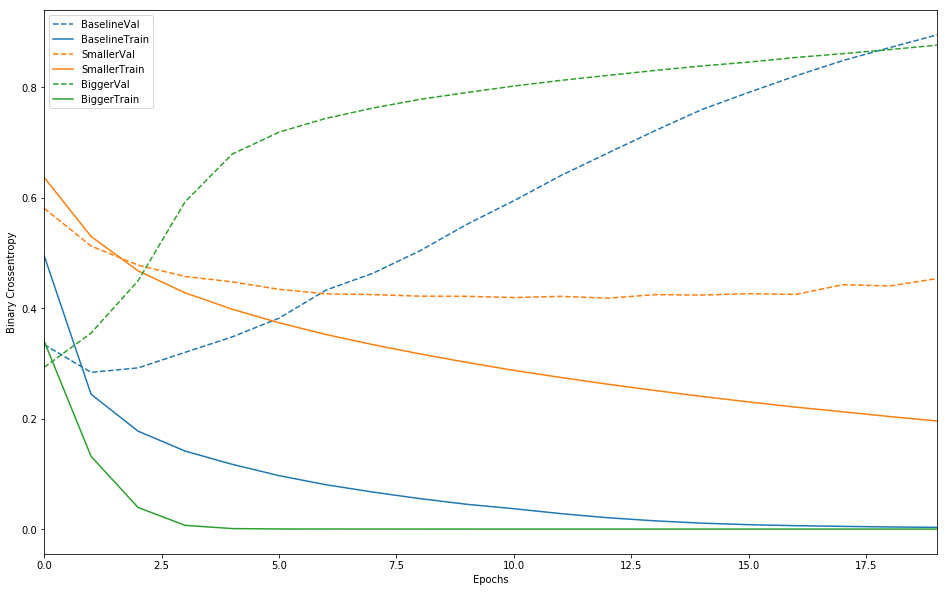

In [59]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:l2
        val = plt.plot(history.epoch,history.history['val_'+key],
                      '--',label=name.title()+'Val'
                      )
        plt.plot(history.epoch,history.history[key],color=val[0].get_color(),
                label=name.title()+'Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline',baseline_history),
                 ('smaller',smaller_history),
                 ('bigger',bigger_history)])

In [62]:

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.5407 - acc: 0.8033 - binary_crossentropy: 0.5018 - val_loss: 0.3921 - val_acc: 0.8761 - val_binary_crossentropy: 0.3510
Epoch 2/20
 - 11s - loss: 0.3107 - acc: 0.9068 - binary_crossentropy: 0.2646 - val_loss: 0.3345 - val_acc: 0.8878 - val_binary_crossentropy: 0.2847
Epoch 3/20
 - 12s - loss: 0.2563 - acc: 0.9280 - binary_crossentropy: 0.2038 - val_loss: 0.3377 - val_acc: 0.8858 - val_binary_crossentropy: 0.2832
Epoch 4/20
 - 14s - loss: 0.2305 - acc: 0.9399 - binary_crossentropy: 0.1744 - val_loss: 0.3515 - val_acc: 0.8826 - val_binary_crossentropy: 0.2943
Epoch 5/20
 - 12s - loss: 0.2177 - acc: 0.9462 - binary_crossentropy: 0.1588 - val_loss: 0.3642 - val_acc: 0.8797 - val_binary_crossentropy: 0.3043
Epoch 6/20
 - 12s - loss: 0.2046 - acc: 0.9514 - binary_crossentropy: 0.1441 - val_loss: 0.3800 - val_acc: 0.8754 - val_binary_crossentropy: 0.3191
Epoch 7/20
 - 12s - loss: 0.1978 - acc: 0.9538 - binary_crosse

baseline
l2


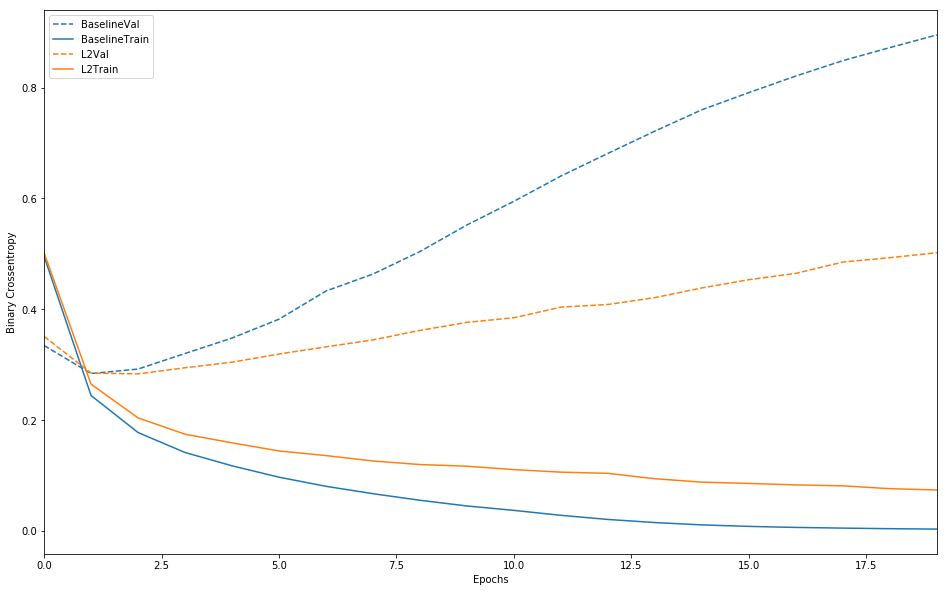

In [63]:
plot_history([('baseline',baseline_history),
             ('l2',l2_model_history)])

In [64]:
dropout_model = keras.models.Sequential([keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
                                        keras.layers.Dropout(0.5),
                                        keras.layers.Dense(16,activation=tf.nn.relu),
                                        keras.layers.Dropout(0.5),
                                        keras.layers.Dense(1,activation=tf.nn.sigmoid)])
dropout_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

dropout_model.history = dropout_model.fit(train_data,train_labels,
                                         epochs=20,
                                         batch_size=512,
                                         validation_data=(test_data,test_labels),
                                         verbose =2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.6587 - acc: 0.6135 - binary_crossentropy: 0.6587 - val_loss: 0.5928 - val_acc: 0.7384 - val_binary_crossentropy: 0.5928
Epoch 2/20
 - 13s - loss: 0.5481 - acc: 0.8046 - binary_crossentropy: 0.5481 - val_loss: 0.4899 - val_acc: 0.8660 - val_binary_crossentropy: 0.4899
Epoch 3/20
 - 13s - loss: 0.4627 - acc: 0.8628 - binary_crossentropy: 0.4627 - val_loss: 0.4169 - val_acc: 0.8798 - val_binary_crossentropy: 0.4169
Epoch 4/20
 - 14s - loss: 0.3945 - acc: 0.8910 - binary_crossentropy: 0.3945 - val_loss: 0.3725 - val_acc: 0.8853 - val_binary_crossentropy: 0.3725
Epoch 5/20
 - 12s - loss: 0.3391 - acc: 0.9056 - binary_crossentropy: 0.3391 - val_loss: 0.3438 - val_acc: 0.8858 - val_binary_crossentropy: 0.3438
Epoch 6/20
 - 10s - loss: 0.2907 - acc: 0.9150 - binary_crossentropy: 0.2907 - val_loss: 0.3144 - val_acc: 0.8856 - val_binary_crossentropy: 0.3144
Epoch 7/20
 - 10s - loss: 0.2495 - acc: 0.9234 - binary_crosse

baseline
dropout


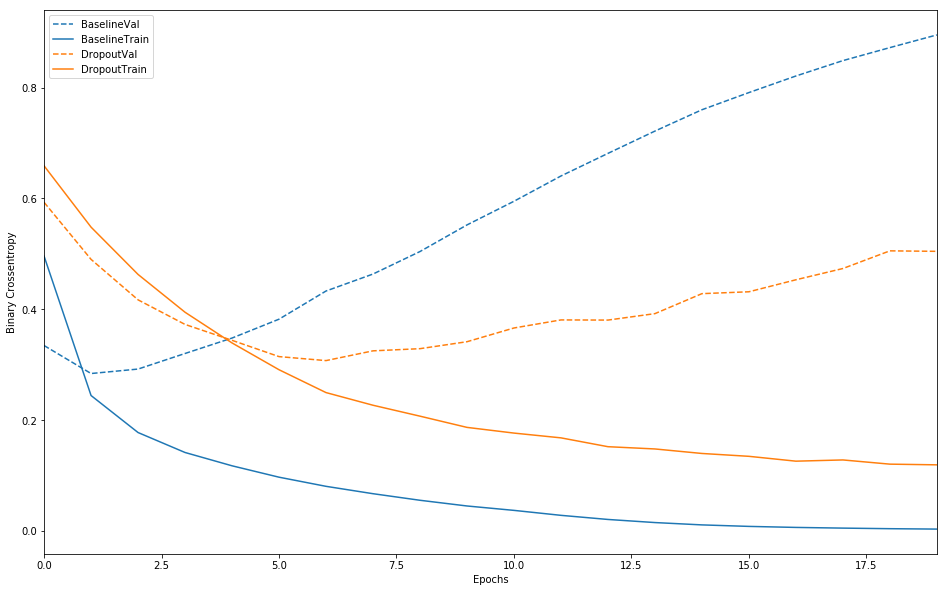

In [66]:
plot_history([('baseline',baseline_history),('dropout',dropout_model.history)])